In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.optimize as optimize
from copy import deepcopy


Creating functions needed for the empirical questions:

[Float64Index([0.07671232876712329], dtype='float64'), Float64Index([0.4958904109589041], dtype='float64'), Float64Index([1.0794520547945206], dtype='float64'), Float64Index([1.5835616438356164], dtype='float64'), Float64Index([2.0794520547945203], dtype='float64'), Float64Index([2.5835616438356164], dtype='float64'), Float64Index([3.0794520547945203], dtype='float64'), Float64Index([3.5835616438356164], dtype='float64'), Float64Index([4.079452054794521], dtype='float64'), Float64Index([4.583561643835616], dtype='float64')]


Text(0.5, 1.0, 'YTM curve')

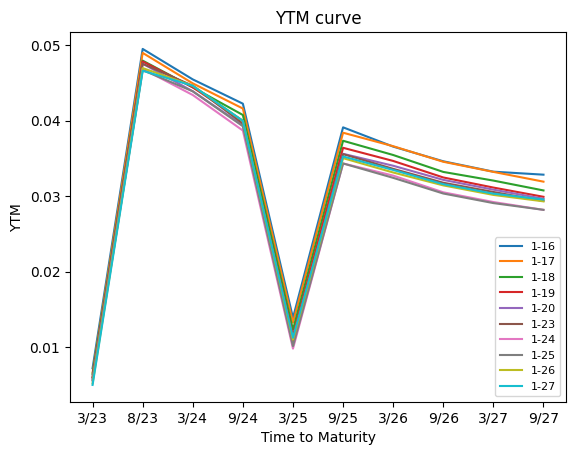

In [267]:
###question 4(a) ###

#importing and formating data needed
bond_data = pd.read_excel(r'/Users/susanliu/Desktop/APM466/10bond_data.xlsx')

#formating the dates
bond_data['Issue Date'] = pd.to_datetime(bond_data['Issue Date'])
coupon = [0.0175, 0.0025, 0.0225, 0.015, 0.0125, 0.005, 0.0025, 0.01, 0.0125, 0.0275]
Maturity_date = ['2023-03-01', '2023-08-01', '2024-03-01', '2024-09-01','2025-03-01', '2025-09-01', '2026-03-01', 
                    '2026-09-01', '2027-03-01', '2027-09-01'] 
chosen_date_list = ['2023-01-10', '2023-01-11', '2023-01-12','2023-01-13', '2023-01-16', '2023-01-17', 
                    '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24']
today_date =['2023-02-01']
date_name = ['Jan 10', 'Jan 11', 'Jan 12', 'Jan 13', 'Jan 16', 'Jan 17', 'Jan 18', 'Jan 19', 'Jan 20', 'Jan 23', 'Jan 24']
gap = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

#setting constants
freq = 2.0
fv = 100.0

#calculating the dates between maturity date and present date
T_lst = []
t = today_date
today_date_t = pd.to_datetime(today_date)
MD = []
for i in range(10):
    MD.append(pd.to_datetime(Maturity_date[i]))
for i in range(10):
    T1 = (MD[i] - today_date_t).days / 365
    T_lst.append(T1)
print(T_lst)

#calculating the ytm for each bond using the Newton's method
def dytm(notional, T, coup, price, freq=2.0, guess = 0.05, gap_lst = gap):
    coupon = coup * 100/freq 
    t_list = gap_lst[:T]
    if len(t_list) == 0: 
        ytm = lambda y: sum([coupon/(1+y/freq)**(freq*t) for t in t_list]) + notional/(1+y/freq)**(freq*0.5) - price
    else:
        ytm = lambda y: sum([coupon/(1+y/freq)**(freq*t) for t in t_list]) + notional/(1+y/freq)**(freq*t_list[-1]) - price
    return optimize.newton(ytm, guess)
    

#retrieving ytm for each selected dates:
ytm_dic = {}
for i in range(10):
    price_list = bond_data.iloc[0:10,i+7]
    ytm_dic[chosen_date_list[i]] = []
    for n in range(10):
        cur_ytm = dytm(100, n, coupon[n], price_list[n])
        ytm_dic[chosen_date_list[i]].append(cur_ytm)

#graphing YTM curve
x_axis = ['3/23', '8/23', '3/24', '9/24', '3/25', '9/25', '3/26', '9/26', '3/27', '9/27']
time = ['1-16', '1-17', '1-18', '1-19', '1-20', '1-23', '1-24', '1-25', '1-26', '1-27']
#plotting ytm yield curve 
for date in ytm_dic:
    plt.plot(x_axis, ytm_dic[date], label = str(date_name))
plt.xlabel("Time to Maturity")
plt.ylabel("YTM")
plt.legend(time, loc="lower right", prop={'size': 8})
plt.title("YTM curve")



    

In [251]:
print(T_lst)

[Float64Index([0.07671232876712329], dtype='float64'), Float64Index([0.4958904109589041], dtype='float64'), Float64Index([1.0794520547945206], dtype='float64'), Float64Index([1.5835616438356164], dtype='float64'), Float64Index([2.0794520547945203], dtype='float64'), Float64Index([2.5835616438356164], dtype='float64'), Float64Index([3.0794520547945203], dtype='float64'), Float64Index([3.5835616438356164], dtype='float64'), Float64Index([4.079452054794521], dtype='float64'), Float64Index([4.583561643835616], dtype='float64')]


/var/folders/0d/gg499zmn07jbkglbh8dlt6wr0000gn/T/ipykernel_57944/3645571695.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (-np.log(price/notional)/T) * 100


Text(0.5, 1.0, 'Spot curve')

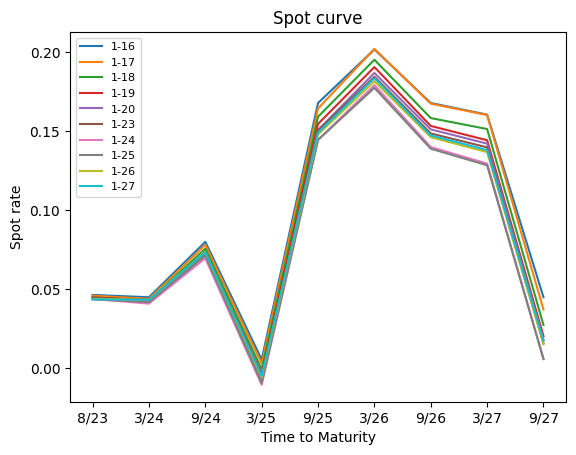

In [279]:
### question 4(b) ###
#fining spot rate and generating spot curve
#finding the spot rate for the first T with zero coupon
def spot_rate_zero_coup(price, notional, T):
    return (-np.log(price/notional)/T) * 100

def spot_rate_with_coup(price, notional, T_lst, coupon, spot_rate_list):
    for i in range(len(spot_rate_list)):
        price -= coupon * np.exp(-spot_rate_list[i] * T_lst[i]) 
    return -(np.log(price / notional)/gap[len(spot_rate_list)])

notional = 100
spotrate = []
spot_dic = {}
for i in range(10):
    price_list = bond_data.iloc[0:10,i+7]
    spot_dic[chosen_date_list[i]] = []
    sr_lst = []
    for n in range(10):
        if T_lst[n] < 0.1: #setting condition, so that the first spot with zero coupon is recorded into the list
            first_spot = spot_rate_zero_coup(price_list[n], notional, n)
            spot_dic[chosen_date_list[i]].append(first_spot)
            sr_lst.append(first_spot)
        else:
            spot_r = spot_rate_with_coup(price_list[n], notional, T_lst, coupon, spot_rate_list =[])
            spot_dic[chosen_date_list[i]].append(spot_r)
            sr_lst.append(spot_r)


#graphing the spot rate curve using data added to the spot_dic dictionary
x_axis = ['3/23', '8/23', '3/24', '9/24', '3/25', '9/25', '3/26', '9/26', '3/27', '9/27']
for date in spot_dic:
    plt.plot(x_axis, spot_dic[date])
plt.xlabel("Time to Maturity")
plt.ylabel("Spot rate")
plt.legend(time, loc="upper left", prop={'size': 8})
plt.title("Spot curve")


In [ ]:
### question 4(c) ###
#setting constants
t1 = 1
t2_lst = [2, 3, 4, 5]

#collecting bonds that mature creating a temperary dictionary for the r2 in below's calculation
temp = {}
for i in range(10):
    temp[chosen_date_list[i]] = []
    y2 = spot_dic[chosen_date_list[i]][3]
    y3 = spot_dic[chosen_date_list[i]][5]
    y4 = spot_dic[chosen_date_list[i]][7]
    y5 = spot_dic[chosen_date_list[i]][9]
    temp[chosen_date_list[i]].append(y2)
    temp[chosen_date_list[i]].append(y3)
    temp[chosen_date_list[i]].append(y4)
    temp[chosen_date_list[i]].append(y5)

forward_dic = {}
forward_rate_t1 = []
for i in range(10):
    fr = spot_dic[chosen_date_list[i]][1]
    forward_rate_t1.append(fr)

#calculating forward rate for each bond
for i in range(10):
    price_list = bond_data.iloc[0:10,i+7]
    forward_dic[chosen_date_list[i]] = []
    for n in range(4):
        r2 = temp[chosen_date_list[i]][n]
        t2= t2_lst[n]
        r1 = forward_rate_t1[i-2]
        forward_rate = (r2 * t2 - r1 * 1)/(t2-t1)
        forward_dic[chosen_date_list[i]].append(forward_rate)

#graphing the forward rates into a curve
x_axis = ['3/23', '8/23', '3/24', '9/24']
for date in forward_dic:
    plt.plot(x_axis, forward_dic[date])
plt.xlabel("Time to Maturity")
plt.ylabel("Spot rate")
plt.legend(time, loc="lower left", prop={'size': 6})
plt.title("forward curve")


In [278]:
#finding yield matrix using the formula given
ytm_matrix = np.zeros([9, 5])
for i in range(5):
    for j in range(9):
        ytm_matrix[j, i] = math.log((ytm_dic[chosen_date_list[j+1]][i*2]) / (ytm_dic[chosen_date_list[j]][i*2]))
ytm_cov_matrix = np.cov(ytm_matrix.T)
ytm_eig_val, ytm_eig_vec = np.linalg.eig(ytm_cov_matrix)
print("yield covariance matrix")
print(ytm_cov_matrix)
print("eigenvector")
print(ytm_eig_vec)
print("eigenvalue")
print(ytm_eig_val)



yield covariance matrix
[[ 1.50902320e-03  2.85725849e-04  3.12350062e-04 -1.48704704e-04
  -6.84257092e-05]
 [ 2.85725849e-04  2.29331387e-04  6.86646067e-04  1.50553405e-04
   2.46670470e-04]
 [ 3.12350062e-04  6.86646067e-04  3.35792187e-03  8.66238425e-04
   1.17163334e-03]
 [-1.48704704e-04  1.50553405e-04  8.66238425e-04  3.18808637e-04
   4.08937485e-04]
 [-6.84257092e-05  2.46670470e-04  1.17163334e-03  4.08937485e-04
   5.90193773e-04]]
eigenvector
[[-0.10204811 -0.96276521 -0.14729091  0.20015742 -0.03019482]
 [-0.19033563 -0.13773838 -0.1705856  -0.92312444 -0.25207599]
 [-0.88936305  0.03873096  0.44034615  0.07089669  0.09274805]
 [-0.23630748  0.17316672 -0.37002428  0.31600847 -0.82303872]
 [-0.326421    0.1504144  -0.78637347  0.05376408  0.49955082]]
eigenvalue
[4.20089853e-03 1.57477206e-03 1.67229999e-04 4.87390008e-05
 1.36392778e-05]


In [260]:
#fining forward matrix
forward_matrix = np.zeros([9, 4])
for i in range(4):
    for j in range(9):
        forward_matrix[j, i] = math.log(abs((forward_dic[chosen_date_list[j+1]][i])) / abs((forward_dic[chosen_date_list[j]][i])))
forward_matrix = np.cov(forward_matrix.T)
forward_eig_val, forward_eig_vec = np.linalg.eig(forward_matrix)
print("foward rate covariance matrix")
print(forward_matrix)
print("forward rate eigenvector")
print(forward_eig_vec)
print("forward rate eigenvalue")
print(forward_eig_val)


foward rate covariance matrix
[[0.00162388 0.00092944 0.00125736 0.01459867]
 [0.00092944 0.00060305 0.00083255 0.01020362]
 [0.00125736 0.00083255 0.0013928  0.0157771 ]
 [0.01459867 0.01020362 0.0157771  0.2037782 ]]
forward rate eigenvalue
[2.06563786e-01 6.76901636e-04 2.13087255e-05 1.35930664e-04]
forward rate eigenvector
[[ 0.07144924  0.9093883  -0.33990959 -0.22884359]
 [ 0.04983927  0.3206418   0.93989433 -0.10631809]
 [ 0.07701584  0.24514876  0.02157597  0.96618069]
 [ 0.9932168  -0.10051782 -0.02438446 -0.05312204]]
